# **Import Python Package**

In [1]:
!pip install ir_datasets
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.3/113.3 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyautocorpus: filename=pyautocorpus-0.1.9-cp310-cp310-linux_x86_64.whl size=189859 sha256=9f388dda4fa2df3b34afe9b3d803428cc5154b11d90cfab8a46214807af2188b
  Stored in directory: /root/.cache/pip/wheels/e2/be/43/ec1e16468c393f6e474e3be6ec6f17fad2216c088328348630
  Created wheel for warc3-wet-clueweb09: filename=warc3_wet_clueweb09-0.2.5-py3-none-any.whl size=18918 sha256=198f803cf6f0db53f4bb4a87a60b92153389e394e02c5472a2b8f71dfaf1dc7d
  Stored in directory: /root/.cache/pi

In [3]:
import ir_datasets
import datasets
import os
import random
import string
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Load & Preprocess Dataset**

*italicized text*## Load Cranfield Dataset




In [4]:
docs = load_dataset('irds/cranfield', 'docs')
queries = load_dataset('irds/cranfield', 'queries')
qrels = load_dataset('irds/cranfield', 'qrels')

Generating docs split: 0 examples [00:00, ? examples/s]

[INFO] [starting] http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz

http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 0.0%| 0.00/507k [00:00<?, ?B/s]
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 9.7%| 49.2k/507k [00:00<00:01, 241kB/s]
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 19.4%| 98.3k/507k [00:00<00:01, 318kB/s]
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 29.1%| 147k/507k [00:00<00:01, 355kB/s] 
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 50.1%| 254k/507k [00:00<00:00, 488kB/s]
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 100.0%| 507k/507k [00:00<00:00, 811kB/s]
[INFO] [finished] http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: [00:00] [507kB] [809kB/s]

http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: [00:00] [507kB] [801kB/s]
                                                       

Dataset cranfield downloaded and prepared to /root/.cache/huggingface/datasets/irds___cranfield/docs/0.0.0/536466f855c21fe9d9c5db7b5b943c71ea5743bf33bec55c55b69ae3adc5d6c2. Subsequent calls will reuse this data.


Generating queries split: 0 examples [00:00, ? examples/s]

Dataset cranfield downloaded and prepared to /root/.cache/huggingface/datasets/irds___cranfield/queries/0.0.0/536466f855c21fe9d9c5db7b5b943c71ea5743bf33bec55c55b69ae3adc5d6c2. Subsequent calls will reuse this data.


Generating qrels split: 0 examples [00:00, ? examples/s]

Dataset cranfield downloaded and prepared to /root/.cache/huggingface/datasets/irds___cranfield/qrels/0.0.0/536466f855c21fe9d9c5db7b5b943c71ea5743bf33bec55c55b69ae3adc5d6c2. Subsequent calls will reuse this data.


In [5]:
rel_dict = {}
doc_rel, qry_rel = set(), set()
for query in qrels:
  query_id=int(query['query_id'])
  doc_id =int(query['doc_id'].split('_')[0])
  qry_rel.add(query_id)
  doc_rel.add(doc_id)
  if query_id in rel_dict:
    rel_dict[query_id].append(doc_id)
  else:
    rel_dict[query_id] = []
    rel_dict[query_id].append(doc_id)

rel_dict = {int(qid): list(map(int, did_lst)) for (qid, did_lst) in rel_dict.items()}

doc_dict = {}
for i, doc in enumerate(docs):
  doc['doc_id'] = int(doc['doc_id'].split('_')[0])
  if doc['doc_id'] in doc_rel:
    doc_dict[i] = doc['text']


qry_dict={}
for i, qry in enumerate(queries):
  if int(qry['query_id']) in qry_rel:
    qry_dict[i] = qry['text']

In [6]:
rel_sum = 0
for doc_ids in rel_dict.values():
  rel_sum += len(doc_ids)
print(f'Number of queries = {len(qry_dict)}')
print(f'* Example: {qry_dict[1]}')
print(f'\nNumber of documents = {len(doc_dict)}')
print(f'* Example: {doc_dict[1]}')
print(f'\nNumber of q-d+ = {rel_sum}')
print(f'* Example:', {1: rel_dict[1]})

Number of queries = 152
* Example: what are the structural and aeroelastic problems associated with flight
of high speed aircraft .

Number of documents = 924
* Example: simple shear flow past a flat plate in an incompressible fluid of small
viscosity .
in the study of high-speed viscous flow past a two-dimensional body it
is usually necessary to consider a curved shock wave emitting from the
nose or leading edge of the body .  consequently, there exists an
inviscid rotational flow region between the shock wave and the boundary
layer .  such a situation arises, for instance, in the study of the
hypersonic viscous flow past a flat plate .  the situation is somewhat
different from prandtl's classical boundary-layer problem . in prandtl's
original problem the inviscid free stream outside the boundary layer is
irrotational while in a hypersonic boundary-layer problem the inviscid
free stream must be considered as rotational .  the possible effects of
vorticity have been recently discussed 

## Preprocess Text

In [7]:
# remove all punctuations
for k, v in qry_dict.items():
  qry_dict[k] = v.translate(str.maketrans('', '', string.punctuation))
for k, v in doc_dict.items():
  doc_dict[k] = v.translate(str.maketrans('', '', string.punctuation))

In [8]:
print('Query')
print(f'* Example: {qry_dict[1]}')
print('Document')
print(f'* Example: {doc_dict[1]}')

Query
* Example: what are the structural and aeroelastic problems associated with flight
of high speed aircraft 
Document
* Example: simple shear flow past a flat plate in an incompressible fluid of small
viscosity 
in the study of highspeed viscous flow past a twodimensional body it
is usually necessary to consider a curved shock wave emitting from the
nose or leading edge of the body   consequently there exists an
inviscid rotational flow region between the shock wave and the boundary
layer   such a situation arises for instance in the study of the
hypersonic viscous flow past a flat plate   the situation is somewhat
different from prandtls classical boundarylayer problem  in prandtls
original problem the inviscid free stream outside the boundary layer is
irrotational while in a hypersonic boundarylayer problem the inviscid
free stream must be considered as rotational   the possible effects of
vorticity have been recently discussed by ferri and libby   in the
present paper the simple

In [9]:
# find unrelated documents for each query
random.seed(500)
unrel_dict = {}
for q, doc_ids in rel_dict.items():
  unrel = [d for d in doc_dict.keys() if d not in doc_ids]
  random.shuffle(unrel)
  unrel_dict[q] = unrel

In [10]:
#split dataset
# train 90% --- test 10%
test_split = int(len(rel_dict) * 0.1)
print(f'Number of queries in train set: {len(rel_dict) - test_split}')
print(f'Number of queries in validation set: {test_split}')

Number of queries in train set: 203
Number of queries in validation set: 22


In [11]:
# create test set
random.seed(500)
test_qry_set = random.sample(list(rel_dict.keys()), test_split)
print('Queries in validation set:')
print(test_qry_set)

Queries in validation set:
[205, 119, 135, 149, 120, 66, 163, 194, 179, 97, 55, 206, 28, 87, 225, 147, 189, 203, 24, 5, 52, 85]


# **DSSM Model**

## Word Hashing

In [12]:
# word hashing
word_hashing = CountVectorizer(lowercase=True, analyzer='char_wb', ngram_range=(3, 3))
word_hashing.fit(list(doc_dict.values()) + list(qry_dict.values()))

CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))

In [13]:
wh_size = len(word_hashing.vocabulary_)
print(f'Number of letter trigrams: {wh_size}')
print(word_hashing.get_feature_names_out())

Number of letter trigrams: 5100
[' 0 ' ' 00' ' 01' ... 'zyn' 'zz ' 'zzl']


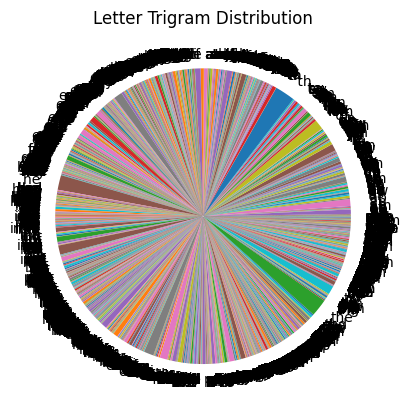

In [14]:
import matplotlib.pyplot as plt

# Compute trigram counts
trigram_counts = word_hashing.transform(list(doc_dict.values()) + list(qry_dict.values())).sum(axis=0)

# Create dictionary with trigram counts
trigram_dict = {}
for trigram, count in zip(word_hashing.get_feature_names_out(), trigram_counts.tolist()[0]):
    trigram_dict[trigram] = count

# Plot pie chart
plt.pie(trigram_dict.values(), labels=trigram_dict.keys())
plt.title('Letter Trigram Distribution')
plt.show()

In [15]:
# create train set: [q, d+, d1-, d2-, d3-, d4-]
train_set = []
for q, doc_ids in rel_dict.items():
  if q not in test_qry_set:
    for idx, d in enumerate(doc_ids):
      sample = [q, d] + unrel_dict[q][idx * 4:(idx + 1) * 4]
      train_set.append(sample)
train_set = np.array(train_set)
print('Examples of training samples in train set: [q, d+, d1-, d2-, d3-, d4-]')
pprint(train_set)
train_set.shape

Examples of training samples in train set: [q, d+, d1-, d2-, d3-, d4-]
array([[   1,  184,  441,  953, 1144,  987],
       [   1,   29,  699,  293,  742,  855],
       [   1,   31,  922,  559,  965,  825],
       ...,
       [ 224, 1157, 1305,  573,  387,  261],
       [ 224, 1274,   83,  878,  956,  817],
       [ 224, 1286, 1056,  417, 1382,  934]])


(1661, 6)

## Create Testing Samples

In [16]:
doc_id_all = np.array(list(doc_dict.keys()))
test_set = []
for q in test_qry_set:
  for i in range(0, 920, 5):
    if i == 920:
      test_set.append([q, doc_id_all[i], doc_id_all[i + 1], 0, 0, 0])
    else:
      test_set.append([q, doc_id_all[i], doc_id_all[i + 1], doc_id_all[i + 2], doc_id_all[i + 3], doc_id_all[i + 4]])
doc_dict[0] = ''
test_set = np.array(test_set)
print(test_set)

[[ 205    1    2    3    4    5]
 [ 205   11   12   13   14   15]
 [ 205   18   19   20   21   22]
 ...
 [  85 1378 1379 1380 1381 1382]
 [  85 1383 1384 1385 1386 1390]
 [  85 1391 1392 1393 1394 1395]]


## Generate TF Dataset

In [17]:
class DataGeneration(tf.keras.utils.Sequence):
  
  def __init__(self, dataset, batch_size, wh_model, shuffle=True):
    self.data = dataset
    self.data_size = len(self.data)
    self.indexes = np.arange(self.data_size)
    self.batch_size = batch_size
    self.wh_model = wh_model
    self.shuffle = shuffle
  
  def __getitem__(self, idx):
    # get data in batch
    last_index = (idx + 1) * self.batch_size
    if last_index < self.data_size:
      indexes = self.indexes[idx * self.batch_size:last_index]
    else:
      indexes = self.indexes[idx * self.batch_size:]
    batch_data = self.data[indexes]
    # use word hashing to embed data
    batch_data_embed = np.zeros((0, 6, wh_size))
    for i, row in enumerate(batch_data):
      batch_data_embed = np.concatenate([batch_data_embed, tf.expand_dims(self.embed(row), axis=0)], axis=0)
    
    return batch_data_embed, tf.zeros((batch_data_embed.shape[0], 1))  # y_true is useless in the model

  def __len__(self):
    return self.data_size // self.batch_size + 1

  def on_epoch_end(self):
    if self.shuffle:
      np.random.RandomState(2023).shuffle(self.indexes)
  
  def embed(self, row):
    default_value = None

    row_list = [qry_dict.get(row[0], default_value)]
    for i in range(1, 6):
        row_list.append(doc_dict.get(row[i], default_value))

    # Filter out any None values before transforming
    filtered_row_list = [x for x in row_list if x is not None]
    transformed_data = self.wh_model.transform(filtered_row_list).toarray()

    # Create an output array with the desired shape and fill it with the transformed data
    output_array = np.zeros((6, wh_size))
    output_array[:transformed_data.shape[0], :transformed_data.shape[1]] = transformed_data

    return output_array

In [20]:
train = DataGeneration(train_set, batch_size=32, wh_model=word_hashing)
test = DataGeneration(test_set, batch_size=32, wh_model=word_hashing)


## Define DSSM

In [21]:
# define cosine similarity layer
class CosSim(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()
  
  def __call__(self, a, b):
    dot_product = tf.multiply(tf.math.l2_normalize(a, axis=1), tf.math.l2_normalize(b, axis=1))
    return tf.math.reduce_sum(dot_product, axis=1, keepdims=True)

In [22]:
# define DSSM model
class DSSM(tf.keras.Model):
  
  def __init__(self):
    super().__init__()
    self.fcn = tf.keras.Sequential(
        [tf.keras.layers.Dense(300, activation='tanh'),
         tf.keras.layers.Dense(300, activation='tanh'),
         tf.keras.layers.Dense(128, activation='tanh')])
    self.sim = CosSim()
    self.concat = tf.keras.layers.Concatenate(axis=-1)

  def call(self, x):
    # fully connected layers
    q = self.fcn(x[:, :3])
    d = self.fcn(x[:, :3])
    d1 = self.fcn(x[:, :3])
    d2 = self.fcn(x[:, 3:])
    d3 = self.fcn(x[:, 3:])
    d4 = self.fcn(x[:, 3:])
    # cosine similarity
    return self.concat([self.sim(q, d), self.sim(q, d1), self.sim(q, d2), self.sim(q, d3), self.sim(q, d4)])

In [23]:
# define the loss of DSSM
class DSSMLoss(tf.keras.losses.Loss):
  
  def call(self, y_true, y_pred):
    return -tf.math.log(tf.nn.softmax(y_pred, axis=-1)[:, 0])

In [24]:
# define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.001,
    verbose=1)
# compile the model
model = DSSM()
model.compile(loss=DSSMLoss(), optimizer=tf.optimizers.Adam(learning_rate=0.0005))

## Train

In [25]:
model.fit(train, epochs=20, callbacks=[early_stopping])

Epoch 1/20
52/52 [==============================] - 17s 250ms/step - loss: 6.4700
Epoch 2/20
52/52 [==============================] - 13s 243ms/step - loss: 6.4637
Epoch 3/20
52/52 [==============================] - 17s 315ms/step - loss: 6.4629
Epoch 3: early stopping


In [26]:
test_pred = model.predict(test)

127/127 [==============================] - 33s 259ms/step


In [27]:
# define average precision (AP)
def avg_precision(retrieved_docs, relevant_docs):
  tp, fp, sum_precision = 0, 0, 0
  for i, doc in enumerate(retrieved_docs):
    if doc in relevant_docs:
      tp += 1
      sum_precision += tp / (tp + fp)
    else:
      fp += 1
  return sum_precision / len(retrieved_docs)
# define reciprocal rank (RR)
def reciprocal_rank(retrieved_docs, relevant_docs):
  rr = 0
  for i, doc in enumerate(retrieved_docs):
    if doc in relevant_docs:
      rr = 1 / (i + 1)
      break
 


In [31]:
ap, rr = 0, 0
test_seg = test_pred.shape[0] // len(test_qry_set)
for i, q in enumerate(test_qry_set):
  test_pred_q = test_pred[i * test_seg:(i + 1) * test_seg].flatten()[:1162]  # all predictions for each query
  retrieved_10_idx = np.argsort(test_pred_q)[::-1][:10]  # reverse sort and get top-10 index
  ap += avg_precision(doc_id_all[retrieved_10_idx], rel_dict[q])
  rr += reciprocal_rank(doc_id_all[retrieved_10_idx], rel_dict[q])
print(f'MAP@10: {ap / len(test_qry_set)}')
print(f'MRR@10: {rr / len(test_qry_set)}')

MAP@10: 0.005681818181818182
MRR@10: 0.056818181818181816


In [32]:
model.fit(train, epochs=40, callbacks=[early_stopping])

Epoch 1/40
52/52 [==============================] - 13s 255ms/step - loss: 6.4623
Epoch 2/40
52/52 [==============================] - 15s 289ms/step - loss: 6.4619
Epoch 2: early stopping


## Evaluate

In [33]:
test_pred = model.predict(test)

127/127 [==============================] - 29s 230ms/step


In [34]:
ap, rr = 0, 0
test_seg = test_pred.shape[0] // len(test_qry_set)
for i, q in enumerate(test_qry_set):
  test_pred_q = test_pred[i * test_seg:(i + 1) * test_seg].flatten()[:1162]  # all predictions for each query
  retrieved_10_idx = np.argsort(test_pred_q)[::-1][:10]  # reverse sort and get top-10 index
  ap += avg_precision(doc_id_all[retrieved_10_idx], rel_dict[q])
  rr += reciprocal_rank(doc_id_all[retrieved_10_idx], rel_dict[q])
print(f'MAP@10: {ap / len(test_qry_set)}')
print(f'MRR@10: {rr / len(test_qry_set)}')

MAP@10: 0.00681818181818182
MRR@10: 0.06818181818181818


In [37]:
model.fit(train, epochs=60, callbacks=[early_stopping])

Epoch 1/60
52/52 [==============================] - 15s 286ms/step - loss: 6.4615
Epoch 2/60
52/52 [==============================] - 13s 255ms/step - loss: 6.4615
Epoch 2: early stopping


In [38]:
test_pred = model.predict(test)

127/127 [==============================] - 24s 191ms/step


In [ ]:
ap, rr = 0, 0
test_seg = test_pred.shape[0] // len(test_qry_set)
for i, q in enumerate(test_qry_set):
  test_pred_q = test_pred[i * test_seg:(i + 1) * test_seg].flatten()[:924]  # all predictions for each query
  retrieved_10_idx = np.argsort(test_pred_q)[::-1][:10]  # reverse sort and get top-10 index
  ap += avg_precision(doc_id_all[retrieved_10_idx], rel_dict[q])
  rr += reciprocal_rank(doc_id_all[retrieved_10_idx], rel_dict[q])
print(f'MAP@10: {ap / len(test_qry_set)}')
print(f'MRR@10: {rr / len(test_qry_set)}')

MAP@10: 0.06587301587301587
MRR@10: 0.21428571428571427


In [41]:
model.fit(train, epochs=100, callbacks=[early_stopping])

Epoch 1/100
52/52 [==============================] - 14s 262ms/step - loss: 6.4615
Epoch 2/100
52/52 [==============================] - 17s 333ms/step - loss: 6.4615
Epoch 2: early stopping


In [42]:
test_pred = model.predict(test)

127/127 [==============================] - 34s 267ms/step


In [46]:
ap, rr = 0, 0
test_seg = test_pred.shape[0] // len(test_qry_set)
for i, q in enumerate(test_qry_set):
  test_pred_q = test_pred[i * test_seg:(i + 1) * test_seg].flatten()[:924]  # all predictions for each query
  retrieved_10_idx = np.argsort(test_pred_q)[::-1][:10]  # reverse sort and get top-10 index
  ap += avg_precision(doc_id_all[retrieved_10_idx], rel_dict[q])
  rr += reciprocal_rank(doc_id_all[retrieved_10_idx], rel_dict[q])
print(f'MAP@10: {ap / len(test_qry_set)}')
print(f'MRR@10: {rr / len(test_qry_set)}')

MAP@10: 0.002813852813852814
MRR@10: 0.01515151515151515
